In [5]:
!pip install joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datacompy
import os
import numpy as np
from joblib import dump, load
from scipy.io import arff

# narzedzia
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_val_predict,
    learning_curve,
    RepeatedStratifiedKFold,
    GridSearchCV
)
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

# modele + Smote
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler, EditedNearestNeighbours, TomekLinks, NeighbourhoodCleaningRule, InstanceHardnessThreshold, OneSidedSelection, CondensedNearestNeighbour
from ctgan import CTGAN

In [8]:
# code
df = pd.read_csv("D:/ml/xgboost-main/data/spambase/spambase.csv")
df = df.drop_duplicates()
print(df.head())
print(df.dtypes)
df.columns = df.columns.str.replace(r"\[", "I", regex=True).str.replace(r"\(", "C", regex=True)


#add new column = "source" with value = "oryginal" and save
path = "D:\\ml\\xgboost-main\\data\\spambase\\original_dataset.csv"
df = df.copy()
df['source'] = 'original'
#df.to_csv(path)
df = pd.read_csv(path)

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

### Training & Test Data

In [ ]:
df2 = df.drop(columns="source")
y = df2["spam"]
X = df2.drop(columns=["spam"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

#concat X_train & y_train -> used to save files
df_original = pd.concat([X_train, y_train], axis=1)          
df_original['source'] = 'original'  
#df_original.to_csv("D:\\ml\\xgboost-main\\data\\spambase\\orignal_data.csv")
df_original = pd.read_csv("D:\\ml\\xgboost-main\\data\\spambase\\orignal_data.csv")

#save test samples
#y_test.to_csv("D:\\ml\\xgboost-main\\data\\spambase\\test_data\\y_test.csv")
#X_test.to_csv("D:\\ml\\xgboost-main\\data\\spambase\\test_data\\X_test.csv")

(3368, 57)
(842, 57)


## OVERSAMPLING

### SMOTE

Przed Counter({0: 2028, 1: 1340})
Po Counter({0: 2028, 1: 2028})
(4056, 57) (4056,)


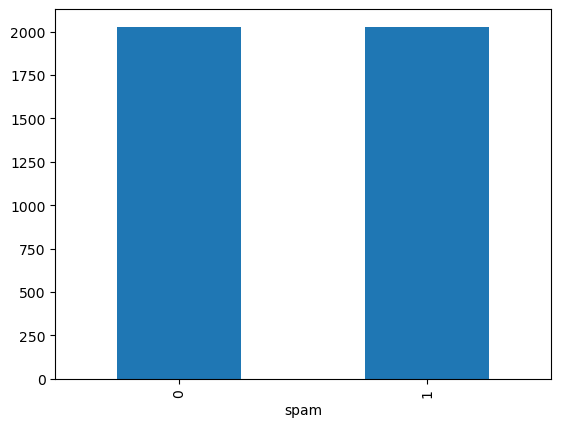

In [ ]:
file_path1 = "D:\\ml\\xgboost-main\\data\\spambase\\smote_data.csv"
#generate new data by SMOTE
con = Counter(y_train)
print("Przed", con)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
con1 = Counter(y_train_sm)
print("Po", con1)

#concat smote train X & y && save data
train_data_smote = pd.concat([X_train_sm, y_train_sm], axis=1)          #polaczenie danych wygenerowanych X_train oraz y_train
train_data_smote['generated_by_smote'] = ['original' if i < len(df_original) else 'smote' for i in range(len(train_data_smote))]
smote_data = train_data_smote[train_data_smote['generated_by_smote'] == 'smote'].drop('generated_by_smote', axis=1)
smote_data["source"]="smote"

if not os.path.exists(file_path1):
    #smote_data.to_csv(file_path1, index=False)
else:
    print(f'Plik istnieje pod ścieżką: {file_path1}')

pd.Series(y_train_sm).value_counts().plot.bar()
print(X_train_sm.shape, y_train_sm.shape)

### BorderLine SMOTE

Przed Counter({0: 2028, 1: 1340})
Po Counter({0: 2028, 1: 2028})
(4056, 57) (4056,)


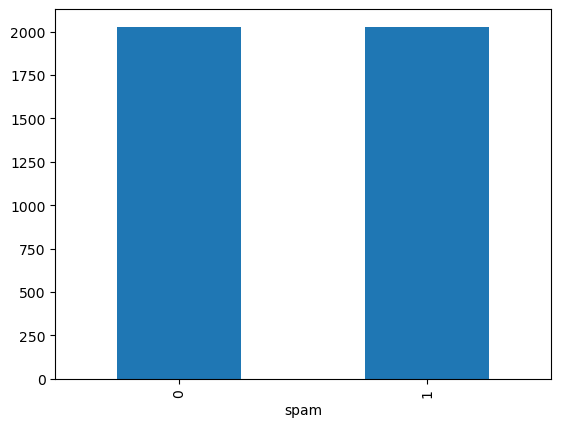

In [ ]:
file_path2 = "D:\\ml\\xgboost-main\\data\\spambase\\boarderlinesmote_data.csv"
#generate new data by borderLineSMOTE
con3 = Counter(y_train)
print("Przed", con3)
brdsmote = BorderlineSMOTE(random_state=42)
X_train_bsm, y_train_bsm = brdsmote.fit_resample(X_train, y_train)
con4 = Counter(y_train_bsm)
print("Po", con4)

train_data_borderline_smote = pd.concat([X_train_bsm, y_train_bsm], axis=1)          #polaczenie danych wygenerowanych X_train oraz y_train
train_data_borderline_smote['generated_by_boarderline_smote'] = ['original' if i < len(df_original) else 'brd smote' for i in range(len(train_data_borderline_smote))]
boarderline_smote_data = train_data_borderline_smote[train_data_borderline_smote['generated_by_boarderline_smote'] == 'brd smote'].drop('generated_by_boarderline_smote', axis=1)
boarderline_smote_data["source"]="borderline smote"
if not os.path.exists(file_path2):
    #boarderline_smote_data.to_csv(file_path2, index=False)
else:
    print(f'Plik istnieje pod ścieżką: {file_path2}')

pd.Series(y_train_bsm).value_counts().plot.bar()
print(X_train_bsm.shape, y_train_bsm.shape)

### GAN

Dane wygenerowane:  spam
1    688
Name: count, dtype: int64
Before Counter({0: 2028, 1: 1340})
After Counter({0: 2028, 1: 2028})


<Axes: xlabel='spam'>

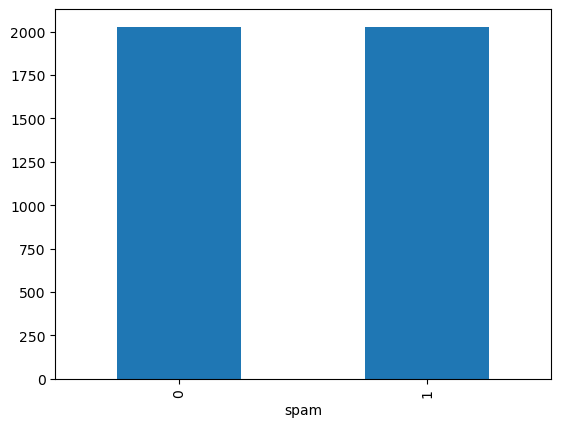

In [ ]:
file_path3 = "D:\\ml\\xgboost-main\\data\\spambase\\GAN_data.csv"        #sciezka wraz z nazwa pod jaka wygenerowac plik
#generate new data by GAN
columns_list = df_original.columns
target_num = df_original['spam'].value_counts()
ctgan = CTGAN(epochs=10)        #model

if target_num[0] > target_num[1]:
    data_y1 = df_original[df_original['spam']==1]
    ctgan.fit(data_y1, columns_list)
    sample = abs(target_num[0]-target_num[1])
    df_GAN = ctgan.sample(sample)
    print('Dane wygenerowane: ', df_GAN['spam'].value_counts())
    balanced_data = pd.concat([df_original, df_GAN], ignore_index=False)
else:
    data_y0 = df_original[df_original['spam']==0]
    ctgan.fit(data_y0, columns_list)
    sample = abs(target_num[0]-target_num[1])
    df_GAN = ctgan.sample(sample)
    print('Dane wygenerowane: ', df_GAN['spam'].value_counts())
    balanced_data = pd.concat([df_original, df_GAN], ignore_index=False)

balanced_data = balanced_data.drop(columns=["source"])  
y_train_gan = balanced_data["spam"]
X_train_gan = balanced_data.drop(columns=["spam"])
con5 = Counter(y_train)
print("Before", con5)
con6 = Counter(y_train_gan)
print("After", con6)
df_GAN["source"]="gan"
gan_data = df_GAN
if not os.path.exists(file_path3):
    #gan_data.to_csv(file_path3, index=False)
else:
    print(f'Plik istnieje pod ścieżką: {file_path3}')

pd.Series(y_train_gan).value_counts().plot.bar()


In [17]:
print(X_train.shape, y_train.shape)
print(X_train_bsm.shape, y_train_bsm.shape)
print(X_train_gan.shape, y_train_gan.shape)
X_train_gan.head()

(3368, 57) (3368,)
(4056, 57) (4056,)
(4056, 57) (4056,)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_C,char_freq_I,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
4061,0.00,0.00,0.00,0.0,0.96,0.48,0.0,0.0,0.48,0.00,...,0.0,0.000,0.000,0.000,0.666,0.000,0.0,4.437,27,142
2336,0.31,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.00,0.00,...,0.0,0.000,0.000,0.051,0.000,0.000,0.0,1.409,12,62
2145,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.333,3,8
1014,0.09,0.49,0.59,0.0,0.39,0.19,0.0,0.0,0.09,0.39,...,0.0,0.767,0.037,0.000,5.840,1.311,0.0,5.960,54,757
4563,0.54,0.00,0.54,0.0,0.54,0.00,0.0,0.0,0.00,0.00,...,0.0,0.000,0.000,0.097,0.000,0.000,0.0,1.512,11,59


### Models + fit_data

In [7]:
models = {
    
    "LR": LogisticRegression(max_iter=500, random_state=0),             # logistic regression dla niezbalansowanych 
    "LR_SMOTE": LogisticRegression(max_iter=1000, random_state=0),       # logistic regression dla zbalansowanych SMOTE
    "LR_BrdSMOTE": LogisticRegression(max_iter=1000, random_state=0),    # logistic regression dla zbalansowanych BoarderrLineSMOTE
    "LR_GAN": LogisticRegression(max_iter=500, random_state=0),         # logistic regression dla zbalansowanych GAN
    
    "DT": DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, random_state=30),             # decision tree dla niezbalansowanych
    "DT_SMOTE": DecisionTreeClassifier(max_depth=12, min_samples_leaf=1, random_state=20),       # decision tree dla zbalansowanych SMOTE
    "DT_BrdSMOTE": DecisionTreeClassifier(max_depth=12, min_samples_leaf=1, random_state=10),     # decision tree dla zbalansowanych BoarderrLineSMOTE
    "DT_GAN": DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, random_state=20),          # decision tree dla zbalansowanych GAN
    
    "RF": RandomForestClassifier(max_depth=16, min_samples_leaf=1, n_estimators=100, random_state=30),             # random forest dla niezbalansowanych
    "RF_SMOTE": RandomForestClassifier(max_depth=16, min_samples_leaf=1, n_estimators=100, random_state=10),       # random forest dla zbalansowanych SMOTE
    "RF_BrdSMOTE": RandomForestClassifier(max_depth=16, min_samples_leaf=1, n_estimators=100, random_state=20),    # random forest dla zbalansowanych BoarderrLineSMOTE
    "RF_GAN": RandomForestClassifier(max_depth=16, min_samples_leaf=1, n_estimators=100, random_state=0),        # random forest dla zbalansowanych GAN
    
    "XGB": XGBClassifier(max_depth=8, subsample=0.9),           # xgboost dla niezbalansowanych
    "XGB_SMOTE": XGBClassifier(max_depth=8, subsample=0.6),     # xgboost dla zbalansowanych SMOTE
    "XGB_BrdSMOTE": XGBClassifier(max_depth=4, subsample=1),    # xgboost dla zbalansowanych BoarderrLineSMOTE
    "XGB_GAN": XGBClassifier(max_depth=16, subsample=0.6),       # xgboost dla zbalansowanych GAN
    
    "XGB_RF": XGBRFClassifier(max_depth=12, n_estimators = 60, subsample=0.7, random_state=0),            # xgboost rf dla niezbalansowanych
    "XGB_RF_SMOTE": XGBRFClassifier(max_depth=16, n_estimators = 40, subsample=0.9, random_state=20),         # xgboost rf dla zbalansowanych SMOTE
    "XGB_RF_BrdSMOTE": XGBRFClassifier(max_depth=16, n_estimators = 60, subsample=0.8, random_state=30),   # xgboost rf dla zbalansowanych BoarderrLineSMOTE
    "XGB_RF_GAN": XGBRFClassifier(max_depth=16, n_estimators = 100, subsample=0.8, random_state=30)          # xgboost rf dla zbalansowanych GAN
}


fit_data = {
    
    "LR": (X_train, y_train),
    "LR_SMOTE": (X_train_sm, y_train_sm),
    "LR_BrdSMOTE": (X_train_bsm, y_train_bsm),
    "LR_GAN": (X_train_gan, y_train_gan),
    
    "DT": (X_train, y_train),
    "DT_SMOTE": (X_train_sm, y_train_sm),
    "DT_BrdSMOTE": (X_train_bsm, y_train_bsm),
    "DT_GAN": (X_train_gan, y_train_gan),
    
    "RF": (X_train, y_train),
    "RF_SMOTE": (X_train_sm, y_train_sm),
    "RF_BrdSMOTE": (X_train_bsm, y_train_bsm),
    "RF_GAN": (X_train_gan, y_train_gan),
    
    "XGB": (X_train, y_train),
    "XGB_SMOTE": (X_train_sm, y_train_sm),
    "XGB_BrdSMOTE": (X_train_bsm, y_train_bsm),
    "XGB_GAN": (X_train_gan, y_train_gan),

    "XGB_RF": (X_train, y_train),
    "XGB_RF_SMOTE": (X_train_sm, y_train_sm),
    "XGB_RF_BrdSMOTE": (X_train_bsm, y_train_bsm),
    "XGB_RF_GAN": (X_train_gan, y_train_gan)
}

NameError: name 'X_train' is not defined

### GridSearch

In [ ]:
#time +- 140min
params = {
    #LR
    "LR": {
        'max_iter': [100, 500, 1000],       # Liczba iteracji
        'random_state': [0, 10, 20, 30, 40]}, # Losowość dla powtarzalności
    
    "LR_SMOTE": {
        'max_iter': [100, 500, 1000],
        'random_state': [0, 10, 20, 30, 40]},
    
    "LR_BrdSMOTE": {
        'max_iter': [100, 500, 1000],
        'random_state': [0, 10, 20, 30, 40]},
    
    "LR_GAN": {
        'max_iter': [100, 500, 1000],
        'random_state': [0, 10, 20, 30, 40]},
    
    #DT
    "DT": {
        'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
        'random_state':[0,10,20,30,40],         # ustalona losowość dla powtarzalności
        'min_samples_leaf':[1,2]},              # minimalna ilosc probek lisci
    
    "DT_SMOTE": {
        'max_depth':[4,8,12,16],                
        'random_state':[0,10,20,30,40],         
        'min_samples_leaf':[1,2]},
    
    "DT_BrdSMOTE": {
        'max_depth':[4,8,12,16],                
        'random_state':[0,10,20,30,40],         
        'min_samples_leaf':[1,2]},
    
    "DT_GAN": {
        'max_depth':[4,8,12,16],                
        'random_state':[0,10,20,30,40],         
        'min_samples_leaf':[1,2]},
    
    #RF
    "RF": {
        'n_estimators':[20,40,60,80,100],       # rozmiar lasu
        'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
        'min_samples_leaf':[1,2],               # minimalna ilosc probek lisci
        'random_state':[0,10,20,30,40]},         # ustalona losowość dla powtarzalności
    
    "RF_SMOTE": {
        'n_estimators':[20,40,60,80,100],      
        'max_depth':[4,8,12,16],              
        'min_samples_leaf':[1,2],               
        'random_state':[0,10,20,30,40]},        

    "RF_BrdSMOTE": {
        'n_estimators':[20,40,60,80,100],      
        'max_depth':[4,8,12,16],              
        'min_samples_leaf':[1,2],               
        'random_state':[0,10,20,30,40]},    
    
    "RF_GAN": {
        'n_estimators':[20,40,60,80,100],      
        'max_depth':[4,8,12,16],              
        'min_samples_leaf':[1,2],               
        'random_state':[0,10,20,30,40]},    
    
    #XGB
    "XGB": {
        'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
        'subsample':[0.5,0.6,0.7,0.8,0.9,1]},
    
    "XGB_SMOTE": {
        'max_depth':[4,8,12,16],                
        'subsample':[0.5,0.6,0.7,0.8,0.9,1]},
    
    "XGB_BrdSMOTE": {
        'max_depth':[4,8,12,16],                
        'subsample':[0.5,0.6,0.7,0.8,0.9,1]},
    
    "XGB_GAN": {
        'max_depth':[4,8,12,16],                
        'subsample':[0.5,0.6,0.7,0.8,0.9,1]},
    
    #XGB_RF
    "XGB_RF": {
        'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
        'n_estimators':[20,40,60,80,100],       # rozmiar lasu
        'subsample':[0.5,0.6,0.7,0.8,0.9,1],
        'random_state':[0,10,20,30,40]},        # ustalona losowość dla powtarzalności
    
    "XGB_RF_SMOTE": {
        'max_depth':[4,8,12,16],                
        'n_estimators':[20,40,60,80,100],       
        'subsample':[0.5,0.6,0.7,0.8,0.9,1],
        'random_state':[0,10,20,30,40]},    
    
    "XGB_RF_BrdSMOTE": {
        'max_depth':[4,8,12,16],                
        'n_estimators':[20,40,60,80,100],       
        'subsample':[0.5,0.6,0.7,0.8,0.9,1],
        'random_state':[0,10,20,30,40]},  
    
    "XGB_RF_GAN": {
        'max_depth':[4,8,12,16],                
        'n_estimators':[20,40,60,80,100],       
        'subsample':[0.5,0.6,0.7,0.8,0.9,1],
        'random_state':[0,10,20,30,40]}     
}
path_files = ["D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\precision_metrics.txt", 
              "D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\f1_metrics.txt", 
              "D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\recall_metrics.txt", 
              "D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\accuracy_metrics.txt"]
excel_file = "D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\metrics2.xlsx"
excel_file1 = "D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\metrics3.xlsx"
excel_file2 = "D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\metrics4.xlsx"
name_sheet1 = "Arkusz1"
name_sheet2 = "Arkusz2"
results1 = []
results2 = []
results3 = []
goal = ['precision', 'recall', 'f1', 'accuracy']

for metrix1 in goal:
    for model_name, model in models.items():
        
        X_train, y_train = fit_data[model_name]
        params_ = params[model_name]
        model_Grid = GridSearchCV(model,param_grid=params_,scoring=metrix1, n_jobs=-1).fit(X_train,y_train)
            
        #save to txt file
        results1.append({
        "Model": model_name,
        "Metric": metrix1,
        "Result": model_Grid.best_score_})
        results2.append({
        "Model": model_name,
        "Metric": metrix1,
        "Std":model_Grid.cv_results_['std_test_score'][model_Grid.best_index_]})
        results3.append({
        "Model": model_name,
        "Metric": metrix1,
        "Best":model_Grid.best_params_})
        df_results1 = pd.DataFrame(results1)
        df_results2 = pd.DataFrame(results2)
        df_results3 = pd.DataFrame(results3)
        df_save_mean = df_results1.pivot(index="Metric", columns="Model", values="Result")
        df_save_std = df_results2.pivot(index="Metric", columns="Model", values="Std")
        df_save_std2 = df_results3.pivot(index="Metric", columns="Model", values="Best")
        with pd.ExcelFile(excel_file) as w:
            df_save_mean.to_excel(w, sheet_name=name_sheet1)
            
            
        with pd.ExcelFile(excel_file1) as w1:
            df_save_std.to_excel(w1, sheet_name=name_sheet1)
        with pd.ExcelFile(excel_file2) as w2:
            df_save_std2.to_excel(w2, sheet_name=name_sheet1)
            
        

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

### Cross Val

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
results_cross_mean=[]
results_cross_std=[]
goal = ['precision','f1','recall','accuracy']
path_files = ["D:\\ml\\xgboost-main\\reports\\spambase\\precision_metrics.txt", 
              "D:\\ml\\xgboost-main\\reports\\spambase\\f1_metrics.txt", 
              "D:\\ml\\xgboost-main\\reports\\spambase\\recall_metrics.txt", 
              "D:\\ml\\xgboost-main\\reports\\spambase\\accuracy_metrics.txt"]

excel_file_cross = "D:\\ml\\xgboost-main\\reports\\spambase\\cross.xlsx"
excel_file_cross2 = "D:\\ml\\xgboost-main\\reports\\spambase\\cross_std.xlsx"
name_sheet1 = "Arkusz1"

for metrix1, path_file in zip(goal, path_files):
    for model_name, model in models.items():
        
        X_train, y_train = fit_data[model_name]
        cross_val_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=metrix1, n_jobs=1)
        print(f"Learn: {metrix1} and model {model_name}")
        with open(path_file, "a+") as f:
            # Zapis wyników do pliku
            print(f'{model_name} Cross-Validation Results {metrix1}:\n {cross_val_results}', file=f)
            print(f'Mean {metrix1}: {cross_val_results.mean()}', file=f)
            print(f'Dev: {cross_val_results.std()}', file=f)
            print("\n", file=f)
        
        results_cross_mean.append({
        "Model": model_name,
        "Metric": metrix1,
        "Result": cross_val_results.mean()})
        results_cross_std.append({
        "Model": model_name,
        "Metric": metrix1,
        "Std": cross_val_results.std()})
        df_results_cross_mean = pd.DataFrame(results_cross_mean)
        df_results_cross_std = pd.DataFrame(results_cross_std)
        df_save_mean = df_results_cross_mean.pivot(index="Metric", columns="Model", values="Result")
        df_save_std = df_results_cross_std.pivot(index="Metric", columns="Model", values="Std")
        
        with pd.ExcelFile(excel_file_cross) as w:
            df_save_mean.to_excel(w, sheet_name=name_sheet1)
        with pd.ExcelFile(excel_file_cross2) as w1:
            df_save_std.to_excel(w1, sheet_name=name_sheet1)
    
for model_name, model in models.items():  
    name = "../models/{model_name}.joblib"  
    dump(model,name)

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: precision and model LR


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: precision and model LR_SMOTE


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: precision and model LR_BrdSMOTE


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: precision and model LR_GAN
Learn: precision and model DT
Learn: precision and model DT_SMOTE
Learn: precision and model DT_BrdSMOTE
Learn: precision and model DT_GAN
Learn: precision and model RF
Learn: precision and model RF_SMOTE
Learn: precision and model RF_BrdSMOTE
Learn: precision and model RF_GAN
Learn: precision and model XGB
Learn: precision and model XGB_SMOTE
Learn: precision and model XGB_BrdSMOTE
Learn: precision and model XGB_GAN
Learn: precision and model XGB_RF
Learn: precision and model XGB_RF_SMOTE
Learn: precision and model XGB_RF_BrdSMOTE
Learn: precision and model XGB_RF_GAN


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: f1 and model LR


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: f1 and model LR_SMOTE


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: f1 and model LR_BrdSMOTE


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: f1 and model LR_GAN
Learn: f1 and model DT
Learn: f1 and model DT_SMOTE
Learn: f1 and model DT_BrdSMOTE
Learn: f1 and model DT_GAN
Learn: f1 and model RF
Learn: f1 and model RF_SMOTE
Learn: f1 and model RF_BrdSMOTE
Learn: f1 and model RF_GAN
Learn: f1 and model XGB
Learn: f1 and model XGB_SMOTE
Learn: f1 and model XGB_BrdSMOTE
Learn: f1 and model XGB_GAN
Learn: f1 and model XGB_RF
Learn: f1 and model XGB_RF_SMOTE
Learn: f1 and model XGB_RF_BrdSMOTE
Learn: f1 and model XGB_RF_GAN


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: recall and model LR


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: recall and model LR_SMOTE


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: recall and model LR_BrdSMOTE


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: recall and model LR_GAN
Learn: recall and model DT
Learn: recall and model DT_SMOTE
Learn: recall and model DT_BrdSMOTE
Learn: recall and model DT_GAN
Learn: recall and model RF
Learn: recall and model RF_SMOTE
Learn: recall and model RF_BrdSMOTE
Learn: recall and model RF_GAN
Learn: recall and model XGB
Learn: recall and model XGB_SMOTE
Learn: recall and model XGB_BrdSMOTE
Learn: recall and model XGB_GAN
Learn: recall and model XGB_RF
Learn: recall and model XGB_RF_SMOTE
Learn: recall and model XGB_RF_BrdSMOTE
Learn: recall and model XGB_RF_GAN


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: accuracy and model LR


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: accuracy and model LR_SMOTE


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: accuracy and model LR_BrdSMOTE


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: accuracy and model LR_GAN
Learn: accuracy and model DT
Learn: accuracy and model DT_SMOTE
Learn: accuracy and model DT_BrdSMOTE
Learn: accuracy and model DT_GAN
Learn: accuracy and model RF
Learn: accuracy and model RF_SMOTE
Learn: accuracy and model RF_BrdSMOTE
Learn: accuracy and model RF_GAN
Learn: accuracy and model XGB
Learn: accuracy and model XGB_SMOTE
Learn: accuracy and model XGB_BrdSMOTE
Learn: accuracy and model XGB_GAN
Learn: accuracy and model XGB_RF
Learn: accuracy and model XGB_RF_SMOTE
Learn: accuracy and model XGB_RF_BrdSMOTE
Learn: accuracy and model XGB_RF_GAN


In [6]:
for model_name, model in models.items():  
    name = "../models/{model_name}.joblib"  
    dump(model,name)

NameError: name 'models' is not defined

#### HeatMap

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


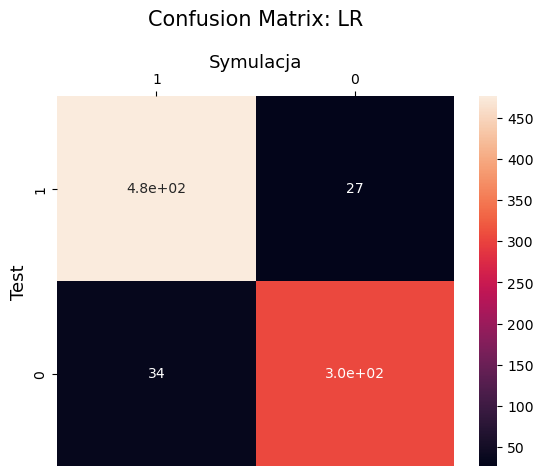

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


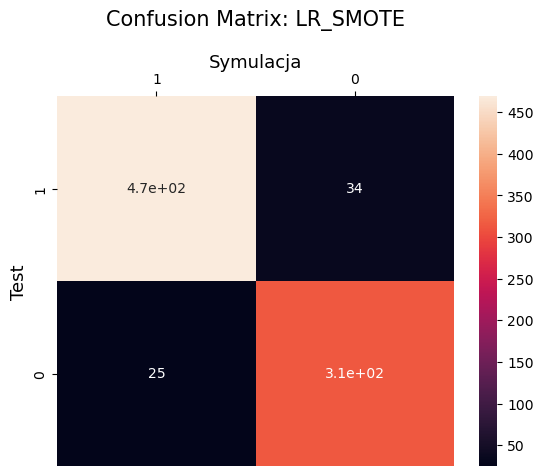

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


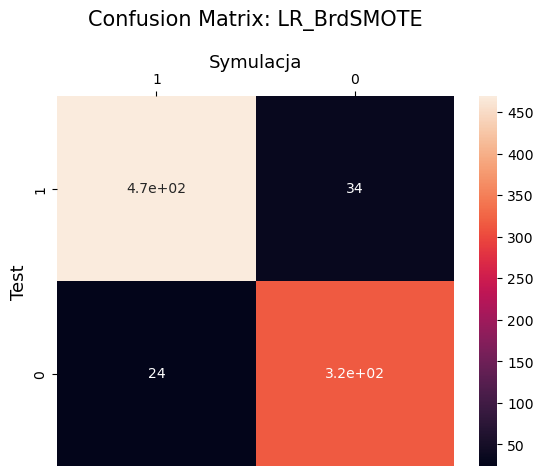

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


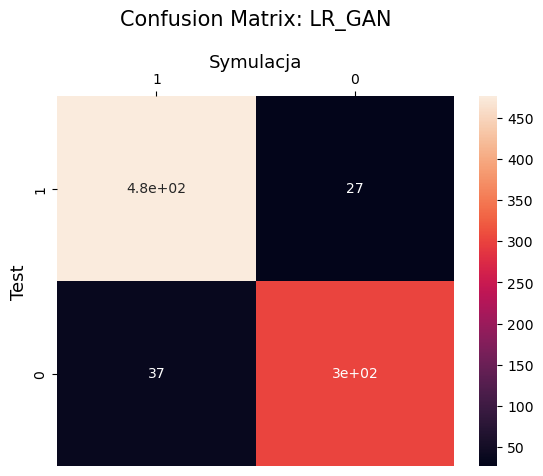

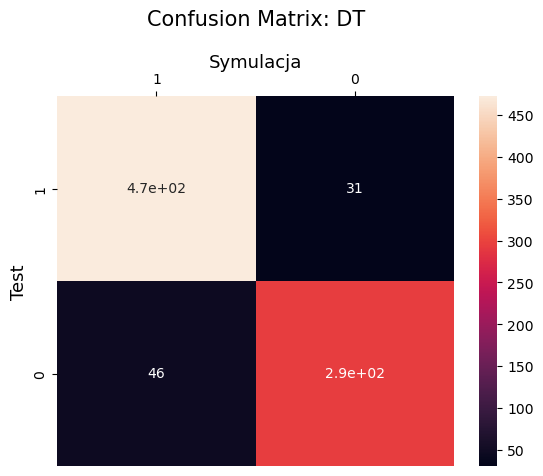

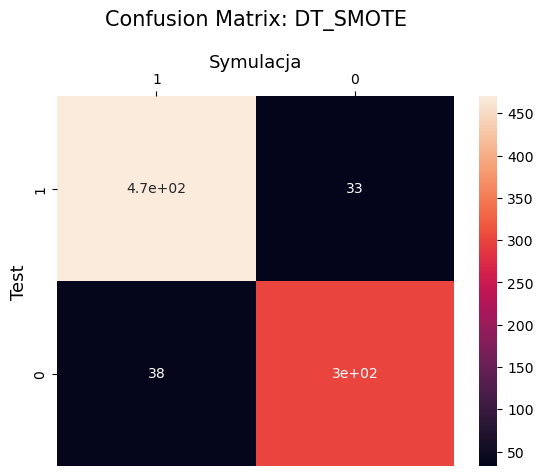

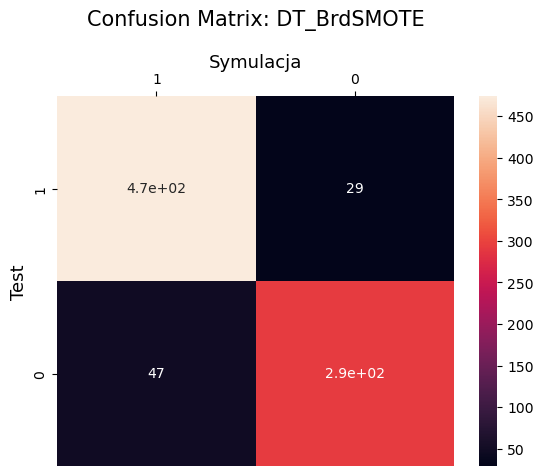

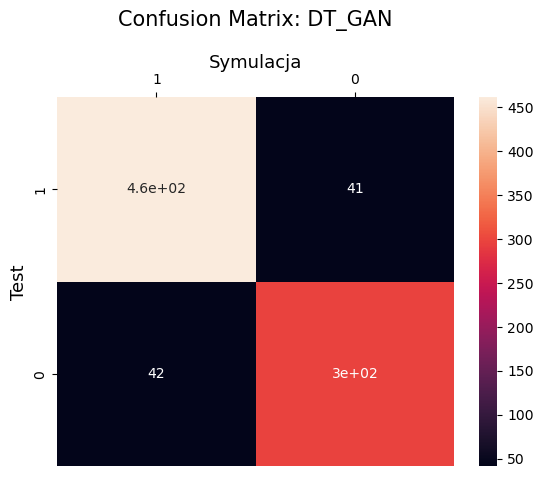

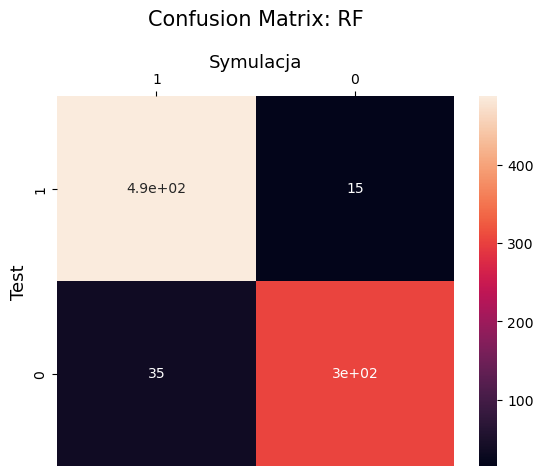

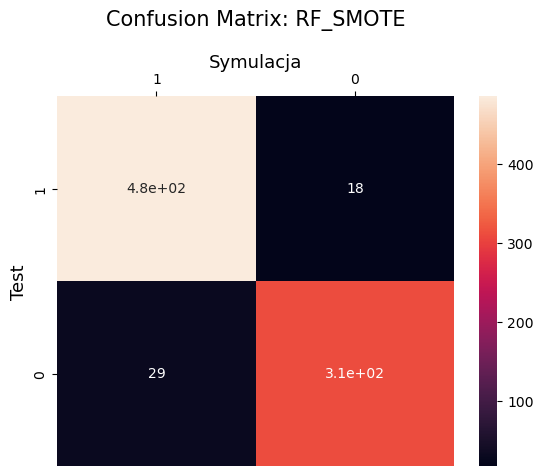

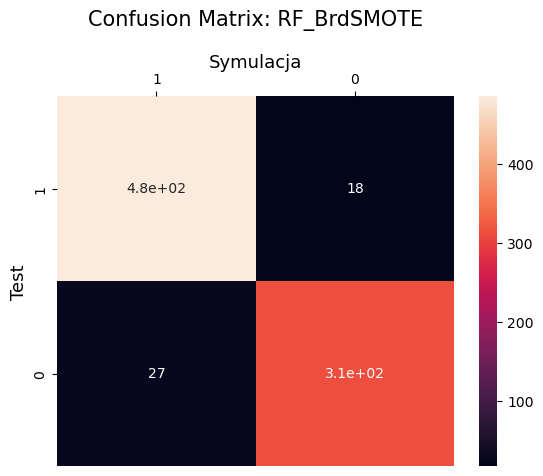

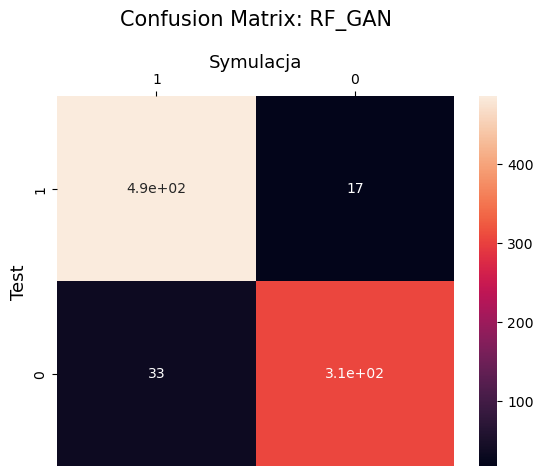

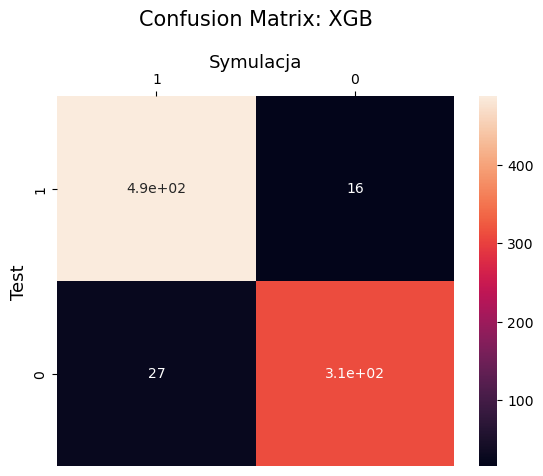

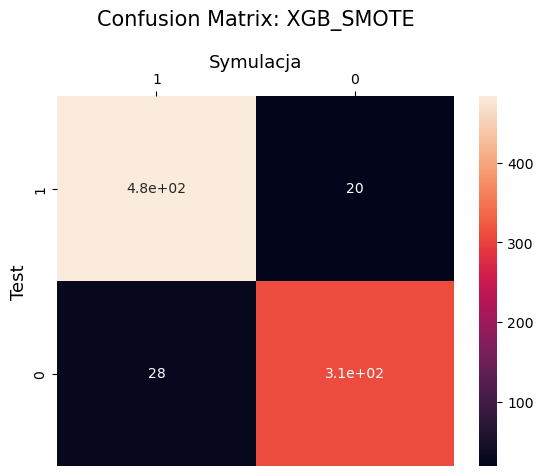

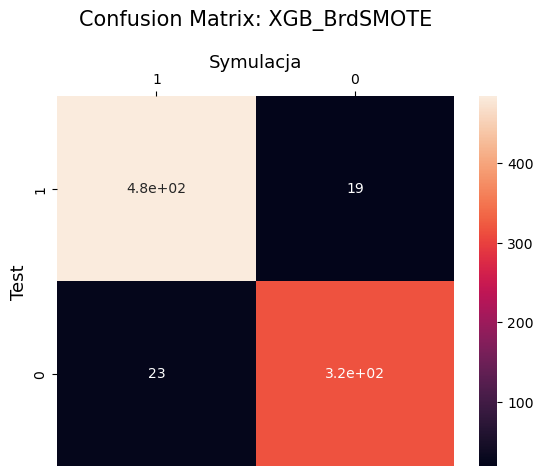

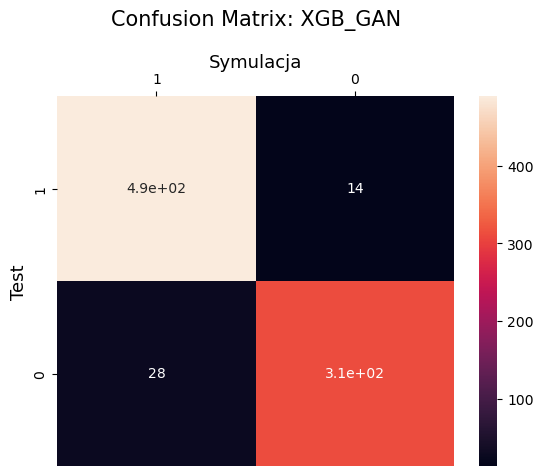

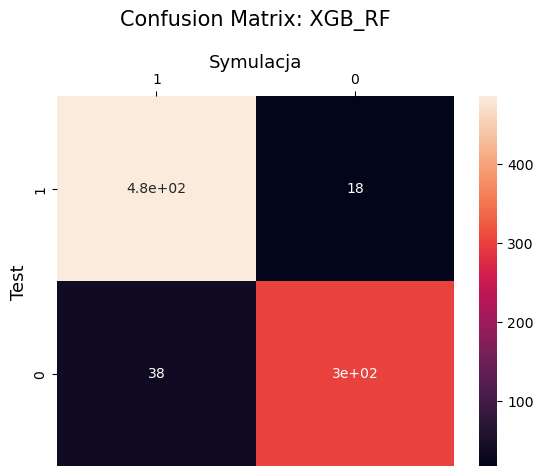

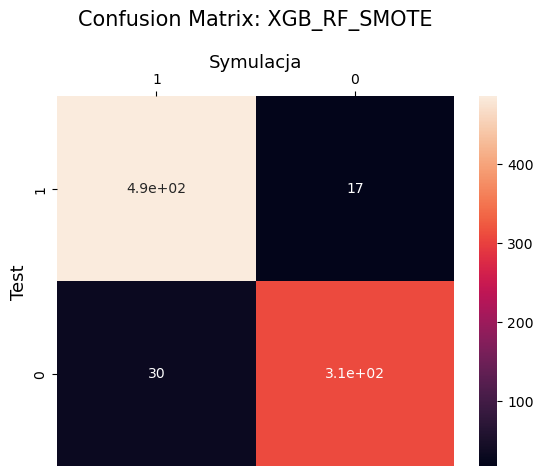

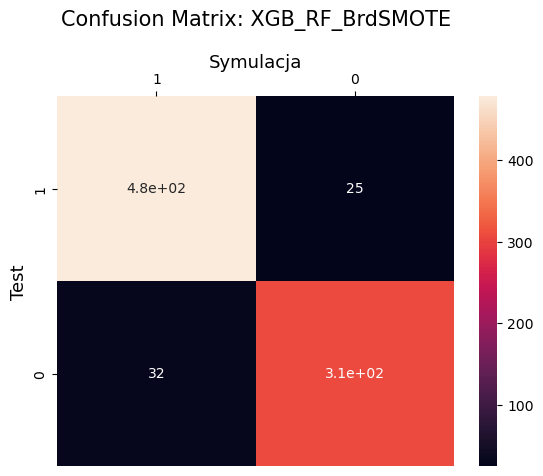

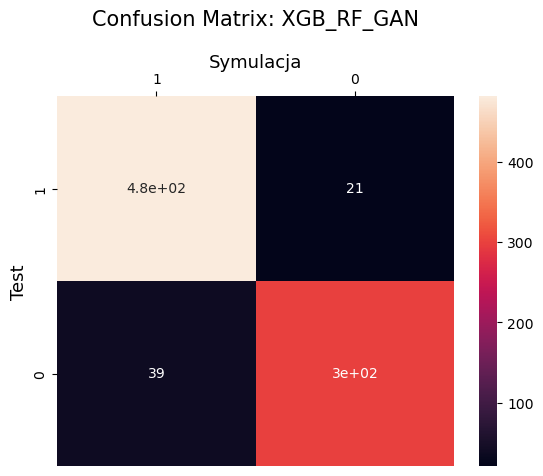

In [21]:
for model_name, model in models.items():
    
    # Pobieramy odpowiednie dane do trenowania dla bieżącego modelu
    X_train, y_train = fit_data[model_name]
    learned = model.fit(X_train, y_train)      
    y_pred = learned.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
            
    sns.heatmap(conf_mat, annot=True, xticklabels=["1", "0"], yticklabels=["1", "0"])
    plt.ylabel("Test", fontsize=13)
    plt.title(f"Confusion Matrix: {model_name}", fontsize=15, pad=20)
    plt.gca().xaxis.set_label_position("top")
    plt.xlabel("Symulacja", fontsize=13)
    plt.gca().xaxis.tick_top()
    plt.savefig(f'D:\\ml\\xgboost-main\\reports\\spambase\\conf matrix\\{model_name}.png', bbox_inches="tight", dpi=200)     
    plt.show()
    plt.close()  

## UNDERSAMPLING

### Data

Classificator: spam
1    3404
0    2028
Name: count, dtype: int64


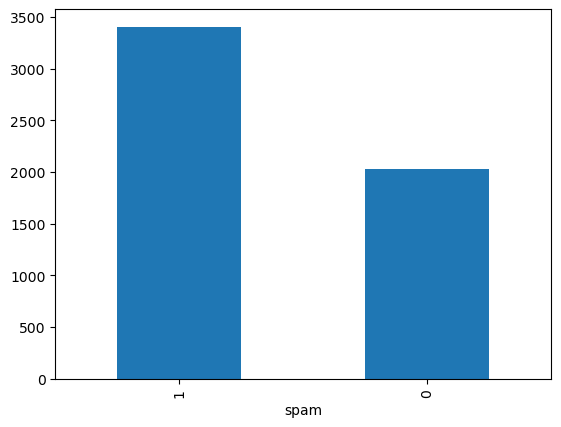

In [ ]:
""" smote_data = pd.read_csv("D:\\ml\\xgboost-main\\data\\spambase\\smote_data.csv")
boarderline_smote_data = pd.read_csv("D:\\ml\\xgboost-main\\data\\spambase\\smote_data.csv")
gan_data = pd.read_csv("D:\\ml\\xgboost-main\\data\\spambase\\smote_data.csv")
df_original = pd.read_csv("D:\\ml\\xgboost-main\\data\\spambase\\orginal_dataset.csv")
X_test = pd.read_csv("D:\\ml\\xgboost-main\\data\\spambase\\test_data\\X_test.csv")
y_test = pd.read_csv("D:\\ml\\xgboost-main\\data\\spambase\\test_data\\y_test.csv")
 """
#sum up all df
data1 = pd.concat([df_original, smote_data])
data2 = pd.concat([boarderline_smote_data, df_GAN])
sum_data = pd.concat([data1, data2])

target_num = sum_data['spam'].value_counts()
print(f'Classificator: {target_num}')
sum_data = sum_data.reset_index(drop=True)

y_under = sum_data['spam']
X_under = sum_data.drop(columns=["spam", "source"])

pd.Series(y_under).value_counts().plot.bar()

#undersampling
RUS_train = {}
for i in range(0, 10):
    
    RUS = RandomUnderSampler(random_state=i)
    X_res, y_res = RUS.fit_resample(X_under, y_under)
    RUS_train[f'X_RUS_{i}'] = X_res, y_res
NM = NearMiss()
X_NM, y_NM = NM.fit_resample(X_under, y_under)

In [23]:
models_under = {
    
    "LR_RUS": LogisticRegression(max_iter=500, random_state=0),             # logistic regression dla niezbalansowanych 
    "LR_NM": LogisticRegression(max_iter=1000, random_state=0),       # logistic regression dla zbalansowanych SMOTE
    
    "DT_RUS": DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, random_state=30),             # decision tree dla niezbalansowanych
    "DT_NM": DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, random_state=40),       # decision tree dla zbalansowanych SMOTE
    
    "RF_RUS": RandomForestClassifier(max_depth=16, min_samples_leaf=1, n_estimators=60, random_state=30),             # random forest dla niezbalansowanych
    "RF_NM": RandomForestClassifier(max_depth=16, min_samples_leaf=1, n_estimators=100, random_state=10),       # random forest dla zbalansowanych SMOTE
    
    "XGB_RUS": XGBClassifier(max_depth=8, subsample=0.5),           # xgboost dla niezbalansowanych
    "XGB_NM": XGBClassifier(max_depth=8, subsample=0.9),     # xgboost dla zbalansowanych SMOTE
    
    "XGB_RF_RUS": XGBRFClassifier(max_depth=16, n_estimators=80, subsample=0.8, random_state=0),            # xgboost rf dla niezbalansowanych
    "XGB_RF_NM": XGBRFClassifier(max_depth=16, n_estimators=60, subsample=0.5, random_state=10),         # xgboost rf dla zbalansowanych SMOTE
   
}

fit_data_under = {
    
    "LR_RUS": (X_RUS, y_RUS),
    "LR_NM": (X_NM, y_NM),
    
    "DT_RUS": (X_RUS, y_RUS),
    "DT_NM": (X_NM, y_NM),
    
    "RF_RUS": (X_RUS, y_RUS),
    "RF_NM": (X_NM, y_NM),

    "XGB_RUS": (X_RUS, y_RUS),
    "XGB_NM": (X_NM, y_NM),
    
    "XGB_RF_RUS": (X_RUS, y_RUS),
    "XGB_RF_NM": (X_NM, y_NM),
}

### GridSearch

In [36]:
# PARAMS to Search
params2 = {  
    #LR                            
    "LR_RUS": {
        'max_iter': [100, 500, 1000],           # Liczba iteracji
        'random_state': [0, 10, 20, 30, 40]},   # Losowość dla powtarzalności
    
    "LR_NM": {
        'max_iter': [100, 500, 1000],    
        'random_state': [0, 10, 20, 30, 40]}, 
    
    #DT
    "DT_RUS":{
        'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
        'random_state':[0,10,20,30,40],         # ustalona losowość dla powtarzalności
        'min_samples_leaf':[1,2]},              # minimalna ilosc probek lisci        
     
    "DT_NM":{
        'max_depth':[4,8,12,16],                
        'random_state':[0,10,20,30,40],       
        'min_samples_leaf':[1,2]},                    
    
    #RF
    "RF_RUS":{
        'n_estimators':[20,40,60,80,100],       # rozmiar lasu
        'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
        'min_samples_leaf':[1,2],               # minimalna ilosc probek lisci
        'random_state':[0,10,20,30,40]},        # ustalona losowość dla powtarzalności        
    "RF_NM":{
        'n_estimators':[20,40,60,80,100],       
        'max_depth':[4,8,12,16],              
        'min_samples_leaf':[1,2],              
        'random_state':[0,10,20,30,40]}, 
    
    #XGB
    "XGB_RUS": {
        'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
        'subsample':[0.5,0.6,0.7,0.8,0.9,1]},
    
    "XGB_NM": {
        'max_depth':[4,8,12,16],               
        'subsample':[0.5,0.6,0.7,0.8,0.9,1]},
    
    #XGB_RF
    "XGB_RF_RUS": {
        'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
        'n_estimators':[20,40,60,80,100],       # rozmiar lasu
        'subsample':[0.5,0.6,0.7,0.8,0.9,1],
        'random_state':[0,10,20,30,40]},        # ustalona losowość dla powtarzalności        

    "XGB_RF_NM": {
        'max_depth':[4,8,12,16],               
        'n_estimators':[20,40,60,80,100],      
        'subsample':[0.5,0.6,0.7,0.8,0.9,1],
        'random_state':[0,10,20,30,40]},            
}
path_files = ["D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\precision_under_metrics.txt", 
              "D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\f1_under_metrics.txt", 
              "D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\recall_under_metrics.txt", 
              "D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\accuracy_under_metrics.txt"]
excel_file = "D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\metrics_under2.xlsx"
excel_file1 = "D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\metrics_under3.xlsx"
excel_file2 = "D:\\ml\\xgboost-main\\reports\\gridsearch_spambase\\metrics_under4.xlsx"
name_sheet1 = "Arkusz1"
name_sheet2 = "Arkusz2"
results1 = []
results2 = []
results3 = []
goal = ['precision', 'recall', 'f1', 'accuracy']

for metrix1 in goal:
    for model_name, model in models_under.items():
        
        X_train, y_train = fit_data_under[model_name]
        params_ = params2[model_name]
        model_Grid = GridSearchCV(model,param_grid=params_,scoring=metrix1, n_jobs=-1).fit(X_train,y_train)
            
        #save to txt file
        results1.append({
        "Model": model_name,
        "Metric": metrix1,
        "Result": model_Grid.best_score_})
        results2.append({
        "Model": model_name,
        "Metric": metrix1,
        "Std":model_Grid.cv_results_['std_test_score'][model_Grid.best_index_]})
        results3.append({
        "Model": model_name,
        "Metric": metrix1,
        "Best":model_Grid.best_params_})
        df_results1 = pd.DataFrame(results1)
        df_results2 = pd.DataFrame(results2)
        df_results3 = pd.DataFrame(results3)
        df_save_mean = df_results1.pivot(index="Metric", columns="Model", values="Result")
        df_save_std = df_results2.pivot(index="Metric", columns="Model", values="Std")
        df_save_best = df_results3.pivot(index="Metric", columns="Model", values="Best")
        with pd.ExcelFile(excel_file) as w:
            df_save_mean.to_excel(w, sheet_name=name_sheet1)  
        with pd.ExcelFile(excel_file1) as w1:
            df_save_std.to_excel(w1, sheet_name=name_sheet1)
        with pd.ExcelFile(excel_file2) as w2:
            df_save_best.to_excel(w2, sheet_name=name_sheet1)
            
        

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

### Cross Val

In [27]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
results_cross_mean_under=[]
results_cross_std_under=[]
goal = ['precision','f1','recall','accuracy']
path_files = ["D:\\ml\\xgboost-main\\reports\\spambase\\precision_under_metrics.txt", 
              "D:\\ml\\xgboost-main\\reports\\spambase\\f1_under_metrics.txt", 
              "D:\\ml\\xgboost-main\\reports\\spambase\\recall_under_metrics.txt", 
              "D:\\ml\\xgboost-main\\reports\\spambase\\accuracy_under_metrics.txt"]

excel_file_cross = "D:\\ml\\xgboost-main\\reports\\spambase\\cross_under.xlsx"
excel_file_cross2 = "D:\\ml\\xgboost-main\\reports\\spambase\\cross_under_std.xlsx"
name_sheet1 = "Arkusz1"

for metrix1, path_file in zip(goal, path_files):
    for model_name, model in models_under.items():
        
        X_train, y_train = fit_data_under[model_name]
        cross_val_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=metrix1, n_jobs=1)
        print(f"Learn: {metrix1} and model {model_name}")
        with open(path_file, "a+") as f:
            # Zapis wyników do pliku
            print(f'{model_name} Cross-Validation Results {metrix1}:\n {cross_val_results}', file=f)
            print(f'Mean {metrix1}: {cross_val_results.mean()}', file=f)
            print(f'Dev: {cross_val_results.std()}', file=f)
            print("\n", file=f)
        
        results_cross_mean_under.append({
        "Model": model_name,
        "Metric": metrix1,
        "Result": cross_val_results.mean()})
        results_cross_std_under.append({
        "Model": model_name,
        "Metric": metrix1,
        "Std": cross_val_results.std()})
        df_results_cross_under_mean = pd.DataFrame(results_cross_mean_under)
        df_results_cross_under_std = pd.DataFrame(results_cross_std_under)
        df_save_under_mean = df_results_cross_under_mean.pivot(index="Metric", columns="Model", values="Result")
        df_save_under_std = df_results_cross_under_std.pivot(index="Metric", columns="Model", values="Std")
        
        with pd.ExcelFile(excel_file_cross) as w:
            df_save_under_mean.to_excel(w, sheet_name=name_sheet1)
        with pd.ExcelFile(excel_file_cross2) as w1:
            df_save_under_std.to_excel(w1, sheet_name=name_sheet1)

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: precision and model LR_RUS


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: precision and model LR_NM
Learn: precision and model DT_RUS
Learn: precision and model DT_NM
Learn: precision and model RF_RUS
Learn: precision and model RF_NM
Learn: precision and model XGB_RUS
Learn: precision and model XGB_NM
Learn: precision and model XGB_RF_RUS
Learn: precision and model XGB_RF_NM


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: f1 and model LR_RUS


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: f1 and model LR_NM
Learn: f1 and model DT_RUS
Learn: f1 and model DT_NM
Learn: f1 and model RF_RUS
Learn: f1 and model RF_NM
Learn: f1 and model XGB_RUS
Learn: f1 and model XGB_NM
Learn: f1 and model XGB_RF_RUS
Learn: f1 and model XGB_RF_NM


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: recall and model LR_RUS


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: recall and model LR_NM
Learn: recall and model DT_RUS
Learn: recall and model DT_NM
Learn: recall and model RF_RUS
Learn: recall and model RF_NM
Learn: recall and model XGB_RUS
Learn: recall and model XGB_NM
Learn: recall and model XGB_RF_RUS
Learn: recall and model XGB_RF_NM


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: accuracy and model LR_RUS


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Learn: accuracy and model LR_NM
Learn: accuracy and model DT_RUS
Learn: accuracy and model DT_NM
Learn: accuracy and model RF_RUS
Learn: accuracy and model RF_NM
Learn: accuracy and model XGB_RUS
Learn: accuracy and model XGB_NM
Learn: accuracy and model XGB_RF_RUS
Learn: accuracy and model XGB_RF_NM


In [25]:
data_resampled = {
       "RUS" : (X_RUS, y_RUS),
       "NM" : (X_NM, y_NM)}
path_file = "D:\\ml\\xgboost-main\\reports\\spambase\\distribution.txt"

for data_name, data_cal in data_resampled.items():
    X_1, y_1 = data_resampled[data_name]
    data_cal = pd.concat([X_1, y_1], axis=1)
    print(data_name)
    print(data_cal.head())
    data_cal = pd.merge(data_cal, sum_data[['source']], how='left', left_index=True, right_index=True)          #Dopasowanie kolumn w `data` i `data_cal`
    comparison = pd.merge(data_cal, sum_data, how='outer', indicator=True)                  #Połączenie zbiorów danych w celu identyfikacji unikalnych wierszy

#rozklad danych
    original_source_distribution = sum_data['source'].value_counts()        #rozkładu `source` w oryginalnym zbiorze danych

    used_in_training = comparison[comparison['_merge'] == 'both']       #wiersze obecne w obu zbiorach
    training_source_distribution = used_in_training['source'].value_counts()



    source_percentage = (training_source_distribution / training_source_distribution.sum() * 100).fillna(0)     #procentowego udziału danych użytych do treningu

#procentowego udziału dla poszczególnych grup
    percent_original = source_percentage.get('original', 0)
    percent_gan = source_percentage.get('gan', 0)
    percent_boarderline = source_percentage.get('boarderline', 0)
    percent_smote = source_percentage.get('smote', 0)

#wyświetlenie wyników
    with open (path_file, "a+") as f:
        print(f"Uzyty model undersamplingu: {data_name}", file=f)
        print("Rozklad `source` w oryginalnym zbiorze danych:", file=f)
        print(original_source_distribution, file=f)
        print(f"\nRozklad `source` w zbiorze treningowym {data_name}:", file=f)
        print(training_source_distribution, file=f)
        print(f"\nProcent uzycia danych do treningu {data_name} dla kazdej wartosci `source`:", file=f)
        print(f"Oryginal: {percent_original}", file=f)
        print(f"GAN: {percent_gan}", file=f)
        print(f"Boarderline SMOTE: {percent_boarderline}", file=f)
        print(f"SMOTE: {percent_smote}", file=f)
        print("\n", file=f)

RUS
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00                0.0           0.00           0.0   
1            0.31                0.0           0.31           0.0   
2            0.00                0.0           0.00           0.0   
4            0.54                0.0           0.54           0.0   
5            0.00                0.0           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.96            0.48               0.0                 0.0   
1           0.00            0.00               0.0                 0.0   
2           0.00            0.00               0.0                 0.0   
4           0.54            0.00               0.0                 0.0   
5           0.00            0.00               0.0                 0.0   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_C  \
0             0.48             0.0  ...          0.0          0.0  

### Heat Map

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


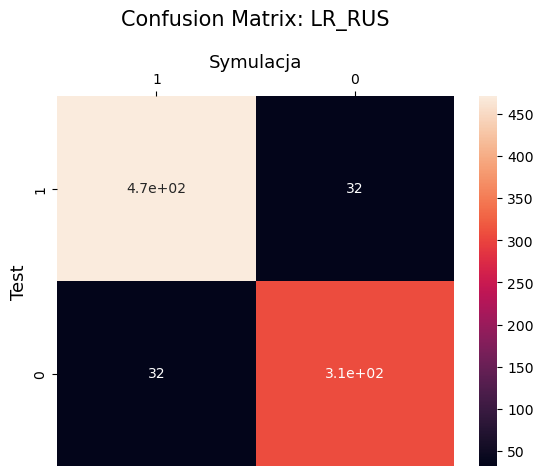

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


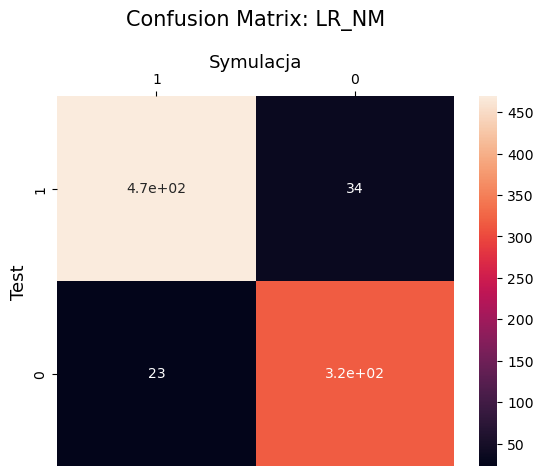

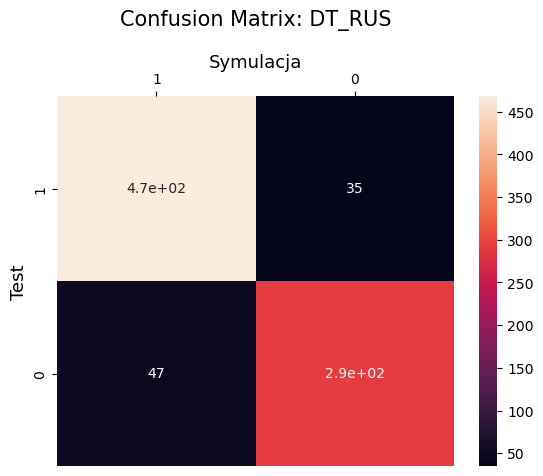

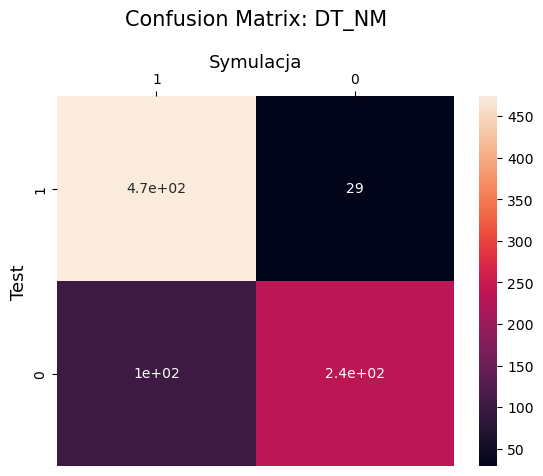

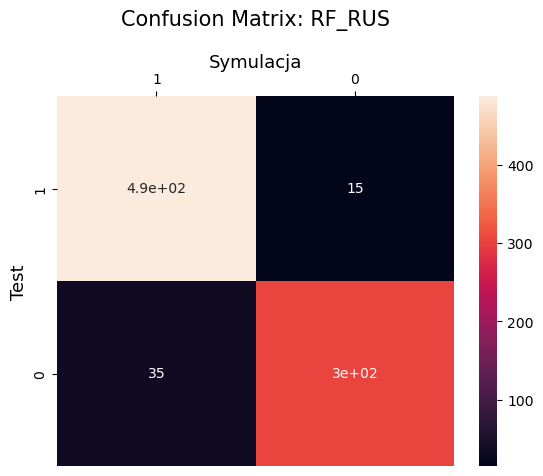

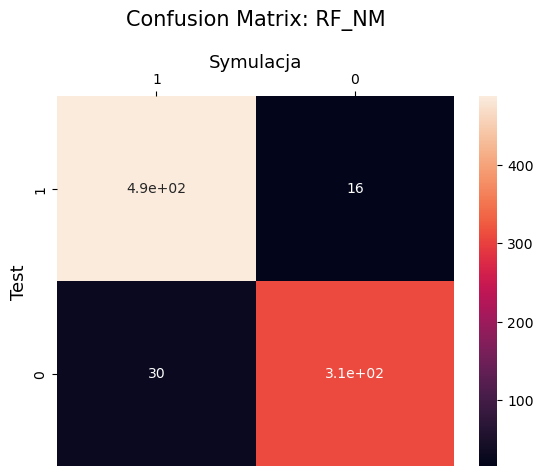

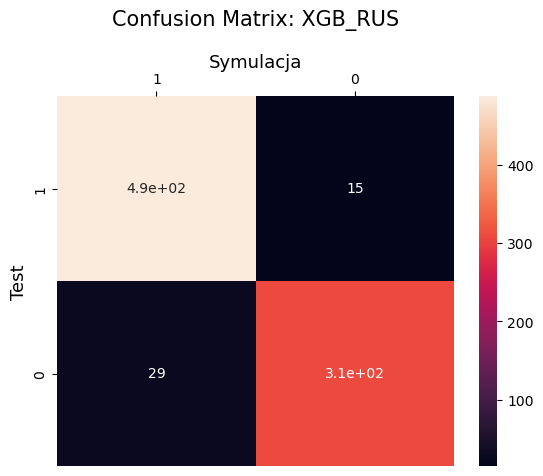

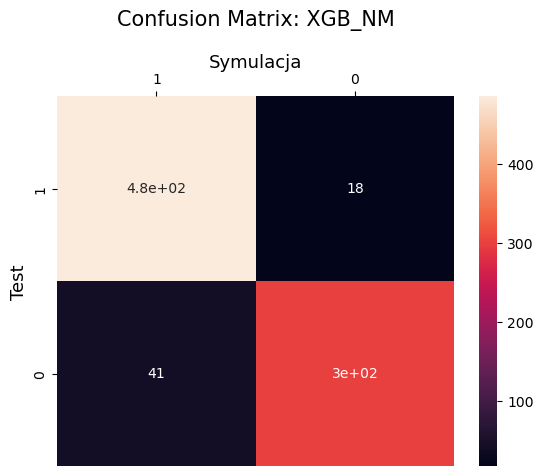

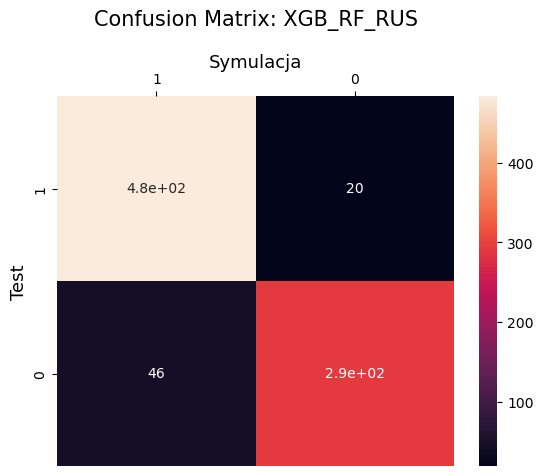

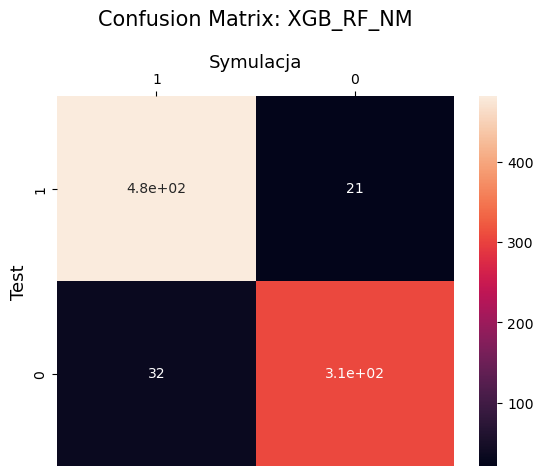

In [28]:
for model_name, model in models_under.items():
    
    # Pobieramy odpowiednie dane do trenowania dla bieżącego modelu
    X_train, y_train = fit_data_under[model_name]
    learned = model.fit(X_train, y_train)      
    y_pred = learned.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
            
    sns.heatmap(conf_mat, annot=True, xticklabels=["1", "0"], yticklabels=["1", "0"])
    plt.ylabel("Test", fontsize=13)
    plt.title(f"Confusion Matrix: {model_name}", fontsize=15, pad=20)
    plt.gca().xaxis.set_label_position("top")
    plt.xlabel("Symulacja", fontsize=13)
    plt.gca().xaxis.tick_top()
    plt.savefig(f'D:\\ml\\xgboost-main\\reports\\spambase\\conf matrix under\\{model_name}.png', bbox_inches="tight", dpi=200)     
    plt.show()
    plt.close()  